Mainly there are two types of dimentionality reduction techniques.

1.Feature Selection : Backward Elemination ,Forward Selection ,Bidirectional Elimination , Score Comparision.

2.Feature Extraction: PCA , LDA , Kernal PCA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
#Importing the dataset


dataset = pd.read_csv('Wine.csv')       #dataset is of type DataFrame

X = dataset.iloc[:,0:13].values           #using .values generates array
y = dataset.iloc[:,-1].values             #x & y is of type np.ndarray


In [15]:
#Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20 , random_state = 0)
print(X.shape)

(178, 13)


In [16]:
#Feature Scaling must be applied when applying Dimensionality Reduction techniques

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train)

[[ 0.87668336  0.79842885  0.64412971 ...  0.0290166  -1.06412236
  -0.2059076 ]
 [-0.36659076 -0.7581304  -0.39779858 ...  0.0290166  -0.73083231
  -0.81704676]
 [-1.69689407 -0.34424759 -0.32337513 ...  0.90197362  0.51900537
  -1.31256499]
 ...
 [-0.70227477 -0.68615078 -0.65828065 ...  0.46549511  0.51900537
  -1.31256499]
 [ 1.13777093 -0.62316862 -0.91876272 ... -0.18922266  1.03282752
   0.80164614]
 [ 1.4610222   0.12361993  0.42085937 ... -1.45501034 -1.2168803
  -0.2719767 ]]


In [12]:
#Applying PCA for knowing the percentage of variance expresssed
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36884109 0.19318394 0.10752862 0.07421996 0.06245904 0.04909
 0.04117287 0.02495984 0.02308855 0.01864124 0.01731766 0.01252785
 0.00696933]


The explained varience ratio  lists the ability of our newly achieved dimensions to express the varience of the dataset.
here we see that only the first two variables can represent almost 56% variance of the data set.
so for visualizing,we choose 2 principle components.


In [17]:
#CAUTIONS:before running this cell ,all cells have to be executed again leaving only the immediate previous cell.
#Applying PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36884109 0.19318394]


In [21]:
#Fitting Logistic Regression to the dataset

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#Prediicting the Test Set results

y_pred = classifier.predict(X_test)

In [23]:
#Making ConfusionMatrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


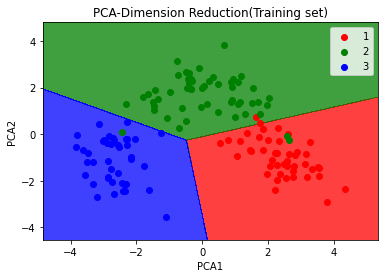

In [29]:
#Visualizing teh training set results 
#For three classes ,three colors have to be provided.
from matplotlib.colors import ListedColormap
X_set ,y_set = X_train ,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green" , "blue")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green" , "blue"))(i), label = j)
plt.title('PCA-Dimension Reduction(Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


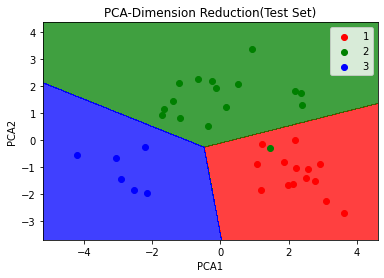

In [30]:
#Visualizing teh test set results 
from matplotlib.colors import ListedColormap
X_set ,y_set = X_test ,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green" , "blue")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green" , "blue"))(i), label = j)
plt.title('PCA-Dimension Reduction(Test Set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
